
# Análise do Monitoramento de Queimadas 

Autores: Matheus Henrique Nonsiboni, Daniel Fiori Souza, Livia Kouketsu da Silva, Rafael Lançoni Santos. 

Este notebook tem o objetivo de analisar dados a respeito do número de queimadas no Brasil e suas informações relevantes.


## Importações


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

RS = 57


## Carregar os dados que serão utilizados


In [10]:
file = 'student-mat.csv' 
data = pd.read_csv(file, sep=';')
print("Dados carregados:")
print(data.head())

Dados carregados:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


## Pré-processamento
Filtrar classes com pelo menos 2 amostras


In [11]:
counts = data['G3'].value_counts()
valid_classes = counts[counts >= 2].index
filtered_data = data[data['G3'].isin(valid_classes)]

# Classificar como aprovado (>= 14) ou reprovado (< 14) para G3, G2 e G1
filtered_data['G3'] = (filtered_data['G3'] >= 14).astype(int)  # 1 = aprovado, 0 = reprovado

filtered_data['G2'] = (filtered_data['G2'] >= 14).astype(int)
filtered_data['G1'] = (filtered_data['G1'] >= 14).astype(int)

# Transformar variáveis categóricas em variáveis numéricas
filtered_data_encoded = pd.get_dummies(filtered_data, drop_first=True)

print(filtered_data_encoded)


     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  \
0        4     1  ...     

/tmp/ipykernel_5061/921973096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['G3'] = (filtered_data['G3'] >= 14).astype(int)  # 1 = aprovado, 0 = reprovado
/tmp/ipykernel_5061/921973096.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['G2'] = (filtered_data['G2'] >= 14).astype(int)
/tmp/ipykernel_5061/921973096.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

## MÉTODO DE PREDIÇÃO KNN (K NEAREST NEIGHBORS)


## 1 - Dividindo o conjunto de dados em treino e teste
Selecionar features (X) e target (y). Prever nota final G3 usando todas as outras colunas como features.


In [12]:
X = filtered_data_encoded.drop(columns=['G3'])
y = filtered_data_encoded['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RS)
print("Conjunto de dados dividido em treino e teste.")
print("Tamanho treino:", X_train.shape, " | Tamanho teste:", X_test.shape)

Conjunto de dados dividido em treino e teste.
Tamanho treino: (314, 41)  | Tamanho teste: (79, 41)



## 2 - Treinar o modelo e fazer previsões 
Métodos fit e predict respectivamente usando a distancia euclidiana para vários valores de K.
Estaremos testando a acurácia, fi-score e a precisão. 

/home/fiori/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/fiori/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/fiori/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/fiori/.local/lib/python3.10/sit

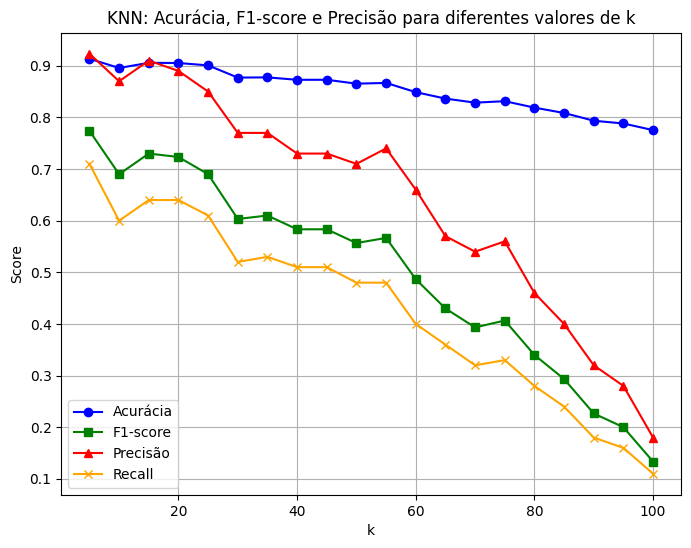

In [13]:
ks = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
accs = []
f1s = []
precisions = []
recall = []
for k in ks:
    knn = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    accs.append(cross_val_score(knn, X, y, cv=50, scoring='accuracy').mean())
    f1s.append(cross_val_score(knn, X, y, cv=50, scoring='f1').mean())
    precisions.append(cross_val_score(knn, X, y, cv=50, scoring='precision').mean())
    recall.append(cross_val_score(knn, X, y, cv=50, scoring='recall').mean())

plt.figure(figsize=(8, 6))
plt.plot(ks, accs, marker='o', label='Acurácia', color='blue')
plt.plot(ks, f1s, marker='s', label='F1-score', color='green')
plt.plot(ks, precisions, marker='^', label='Precisão', color='red')
plt.plot(ks, recall, marker='x', label='Recall', color='orange')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('KNN: Acurácia, F1-score e Precisão para diferentes valores de k')
plt.legend()
plt.grid(True)
plt.show()



## 3 - Usando agora peso nas distâncias (ponderadas)
Os K mais próximos terão mais efeito sobre a decisão do algoritmo.

/home/fiori/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/fiori/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/fiori/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/fiori/.local/lib/python3.10/sit

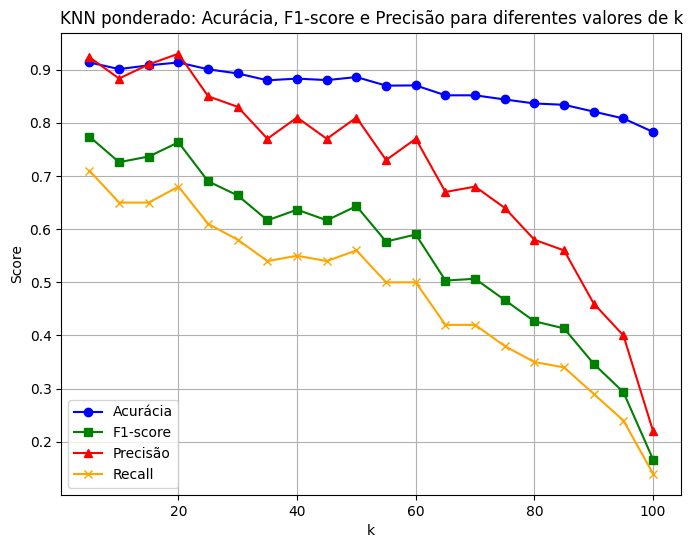

In [14]:
ks = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
accs_distance = []
f1s_distance = []
precisions_distance = []
recalls_distance = []
for k in ks:
    knn_distance = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k, weights='distance'))
    ])
    accs_distance.append(cross_val_score(knn_distance, X, y, cv=50, scoring='accuracy').mean())
    f1s_distance.append(cross_val_score(knn_distance, X, y, cv=50, scoring='f1').mean())
    precisions_distance.append(cross_val_score(knn_distance, X, y, cv=50, scoring='precision').mean())
    recalls_distance.append(cross_val_score(knn_distance, X, y, cv=50, scoring='recall').mean())    

plt.figure(figsize=(8, 6))
plt.plot(ks, accs_distance, marker='o', label='Acurácia', color='blue')
plt.plot(ks, f1s_distance, marker='s', label='F1-score', color='green')
plt.plot(ks, precisions_distance, marker='^', label='Precisão', color='red')
plt.plot(ks, recalls_distance, marker='x', label='Recall', color='orange')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('KNN ponderado: Acurácia, F1-score e Precisão para diferentes valores de k')
plt.legend()
plt.grid(True)
plt.show()


## ÁRVORE DE DECISÃO USANDO ID3 

## 1. Treinamento do modelo DecisionTreeClassifier

Usaremos o critério de **entropia** para as divisões.

In [15]:
# Instanciar o classificador
modelo = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Treinar o modelo
modelo.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## 2. Avaliação do Modelo

Vamos calcular a acurácia no conjunto de teste.

In [16]:
# Avaliar o desempenho
acuracia = modelo.score(X_test, y_test)
print(f"Acurácia no conjunto de teste: {acuracia:.2f}")

Acurácia no conjunto de teste: 0.92


## 3. Visualização da Árvore de Decisão

Agora vamos visualizar a estrutura da árvore treinada.

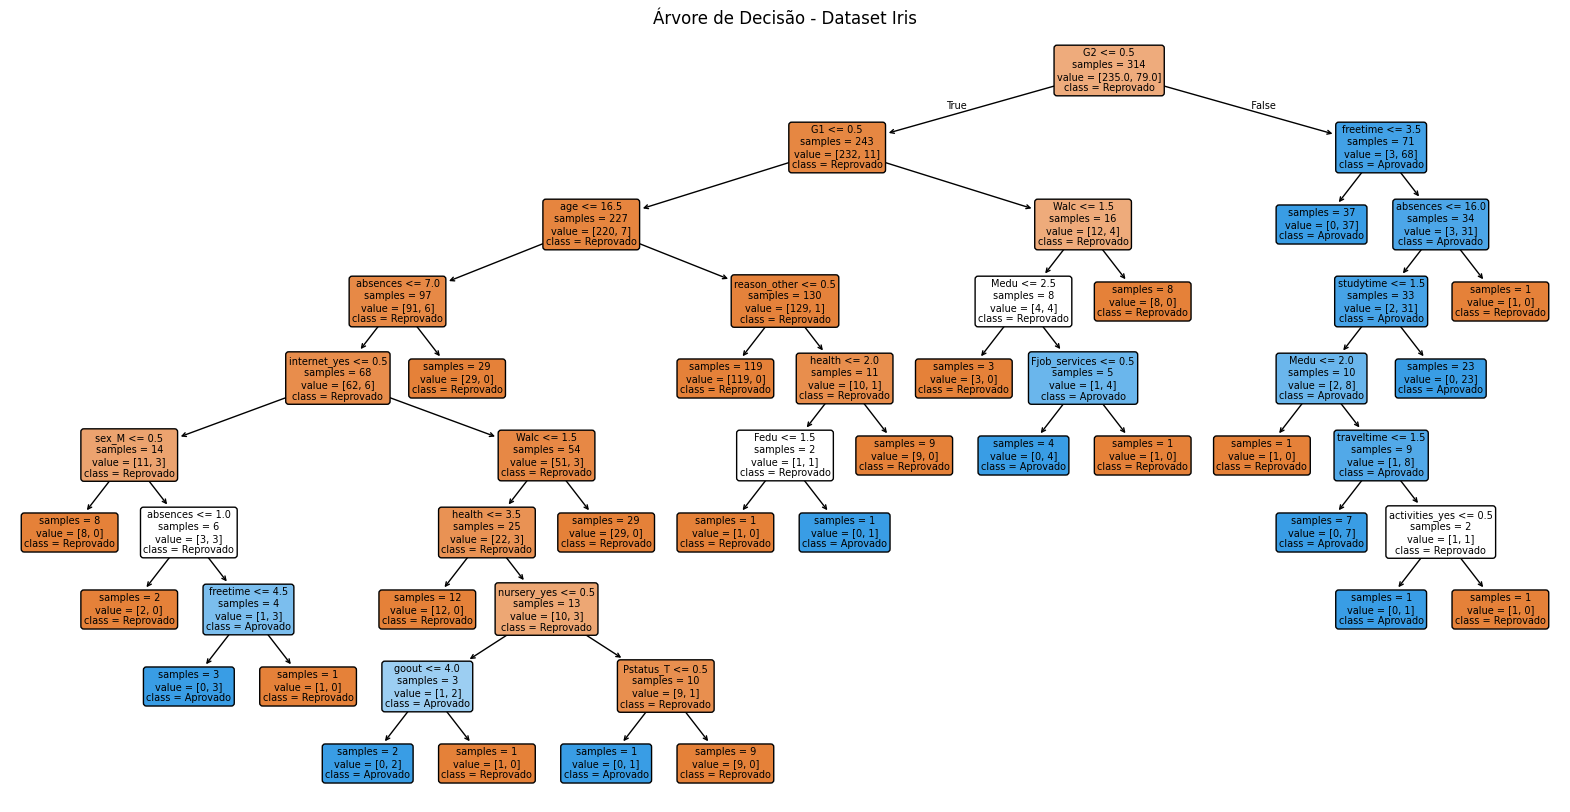

In [19]:
# Plotar a árvore
plt.figure(figsize=(20,10))
plot_tree(modelo, 
          feature_names=filtered_data_encoded.drop('G3', axis=1).columns.tolist(), # 
          class_names=['Reprovado', 'Aprovado'], # classe resultante
          filled=True, 
          rounded=True, 
          impurity=False,
          proportion=False,
          fontsize=7)
plt.title("Árvore de Decisão - Dataset Iris")
plt.show()